In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/text-preprocessing.csv', usecols=["tweet_id", "like_count", "keyword","created_at"])
df

,tweet_id,like_count,keyword,created_at
0,153619597713608704,0.0,energi baru terbarukan,2012-01-01 23:32:20
1,153857491925610496,0.0,energi baru terbarukan,2012-01-02 15:17:39
2,154361424154603520,0.0,energi baru terbarukan,2012-01-04 00:40:06
3,156397219346518017,0.0,energi baru terbarukan,2012-01-09 15:29:37
4,156936339718279168,0.0,energi baru terbarukan,2012-01-11 03:11:53
...,...,...,...,...
109700,1542534421219360772,0.0,ebt,2022-06-30 15:43:59
109701,1542540419677859842,0.0,ebt,2022-06-30 16:07:49
109702,1542557674704740353,0.0,ebt,2022-06-30 17:16:23
109703,1542592685978320896,0.0,ebt,2022-06-30 19:35:30


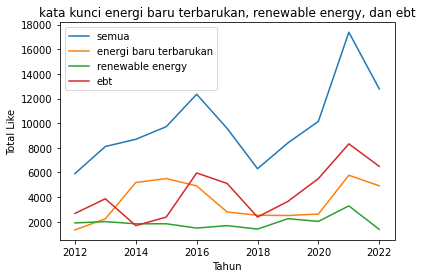

In [3]:
keywords = ['semua', 'energi baru terbarukan', 'renewable energy', 'ebt']

for keyword in keywords:
    if keyword == "semua":
        df_twit = df
    else:
        df_twit = df.loc[df['keyword'] == keyword]
    column_names = ["year", "total"]
    df_like_year = pd.DataFrame(columns = column_names)

    years = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
    for index,year in enumerate(years):
        data_year = None
        data_year = df_twit.loc[(df_twit['created_at'] >= str(year)+'-01-01') & (df_twit['created_at'] <= str(year)+'-12-31')]
        df_like_year.loc[index+1] = [year, data_year['like_count'].count()]
    
    plt.plot(df_like_year['year'].values, df_like_year['total'].values, label=keyword)

plt.title("kata kunci energi baru terbarukan, renewable energy, dan ebt")
plt.xlabel("Tahun")
plt.ylabel("Total Like")
plt.legend()
plt.show()